In [2]:
import nltk, torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install bert-extractive-summarizer
from summarizer import Summarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
modelName = "bert-base-uncased"
model = BertForSequenceClassification.from_pretrained(modelName)
tokenizer = BertTokenizer.from_pretrained(modelName)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/EV Datasets/ev_model_spec.csv")
df2 = pd.read_csv("/content/drive/MyDrive/EV Datasets/ev2_bikewale.csv")

In [7]:
df1.head(2)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250


In [8]:
len(df1),len(df1["Model Name"].unique())

(39, 39)

In [9]:
df2.head(2)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube


In [10]:
len(df2)

844

In [11]:
data = df1.merge(df2, how = 'left', on = 'Model Name')

In [12]:
data.shape

(844, 20)

In [13]:
data.describe()

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,739.000000,716.000000,345.000000,703.000000,185.000000,530.000000,180.000000,390.000000
mean,98918.963270,105.962085,54.763033,101.956161,5.302133,1576.184834,3.363744,3.779432,3.314246,3.527536,3.145092,2.935135,3.664151,3.394444,3.382051
std,29881.823496,33.500921,23.109534,28.624815,1.697097,1308.692680,1.689873,1.350021,1.585024,1.507721,1.637871,1.630587,1.387371,1.392306,1.510949
min,51094.000000,45.000000,25.000000,59.000000,3.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,73124.000000,85.000000,42.000000,76.000000,4.000000,600.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000
50%,91667.000000,90.000000,58.000000,93.000000,5.000000,1200.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,119827.000000,120.000000,65.000000,125.000000,6.000000,2700.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,171250.000000,180.000000,116.000000,150.000000,10.000000,5500.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
data.head(2)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Ampere Magnus EX,104758,121,53,90,7,1200,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN
1,Ampere Magnus EX,104758,121,53,90,7,1200,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN


In [15]:
data.dtypes

Model Name                      object
Price                            int64
Riding Range (km)                int64
Top Speed (kmph)                 int64
Weight (kg)                      int64
Battery Charging Time (hrs)      int64
Rated Power (W)                  int64
review                          object
Used it for                     object
Owned for                       object
Ridden for                      object
rating                           int64
Visual Appeal                  float64
Reliability                    float64
Performance                    float64
Service Experience             float64
Extra Features                 float64
Comfort                        float64
Maintenance cost               float64
Value for Money                float64
dtype: object

In [16]:
data['rating'] = data['rating'].astype(float)

In [17]:
data.isna().sum()

Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
review                          47
Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
dtype: int64

In [18]:
data['Price'].dtype == 'int64'

True

In [19]:
data[data['review'].isna()][:3]

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
232,Hero Electric Flash,59594,85,25,69,5,250,NaN,Daily Commute,Never owned,NaN,5.0,5.0,3.0,NaN,4.0,NaN,4.0,NaN,4.0
233,Hero Electric Flash,59594,85,25,69,5,250,NaN,Everything,Never owned,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0
234,Hero Electric Flash,59594,85,25,69,5,250,NaN,Daily Commute,> 1 yr,10000-15000 kms,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0


### Length of reviews

In [20]:
print(f"Maximum review length is {data['review'].apply(lambda x: len(str(x))).max()}")
print(f"Minimum review length is {data['review'].apply(lambda x: len(str(x))).min()}")

Maximum review length is 5536
Minimum review length is 3


### Getting the sentiment from the column review and creating 3 classes for it:
- Positive
- Negative
- Neutral

In [21]:
data.head(2)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Ampere Magnus EX,104758,121,53,90,7,1200,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5.0,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN
1,Ampere Magnus EX,104758,121,53,90,7,1200,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN


In [22]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

# If the review is not given....we are considering it as neutral sentiment
for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

data['sentiment'] = sentiments_list

In [23]:
data['sentiment'].value_counts()

positive    527
negative    264
neutral      53
Name: sentiment, dtype: int64

In [24]:
data.head(2)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,...,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Ampere Magnus EX,104758,121,53,90,7,1200,Specification is very good\nFuel save is 300% ...,Everything,Never owned,...,5.0,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN,positive
1,Ampere Magnus EX,104758,121,53,90,7,1200,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,...,4.0,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN,positive


### Droping the review feature as we have derived a much more useful feature from it

In [25]:
columnsToDrop = ['review']

In [26]:
data = data.drop(columns = columnsToDrop)

In [27]:
data.dtypes

Model Name                      object
Price                            int64
Riding Range (km)                int64
Top Speed (kmph)                 int64
Weight (kg)                      int64
Battery Charging Time (hrs)      int64
Rated Power (W)                  int64
Used it for                     object
Owned for                       object
Ridden for                      object
rating                         float64
Visual Appeal                  float64
Reliability                    float64
Performance                    float64
Service Experience             float64
Extra Features                 float64
Comfort                        float64
Maintenance cost               float64
Value for Money                float64
sentiment                       object
dtype: object

# Data imputation/ handling of NAN

In [28]:
data.isna().sum()

Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
sentiment                        0
dtype: int64

In [29]:
columnsToProcess = ['Ridden for' , 'Visual Appeal' , 'Reliability' , 'Performance' , 'Service Experience' , 'Extra Features' , 'Comfort' , 'Maintenance cost' , 'Value for Money']

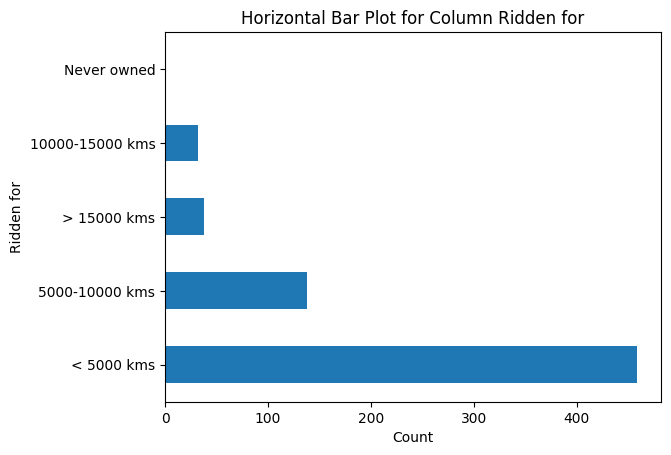

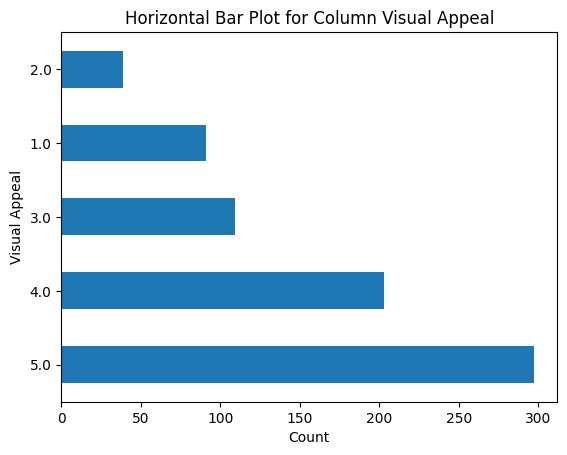

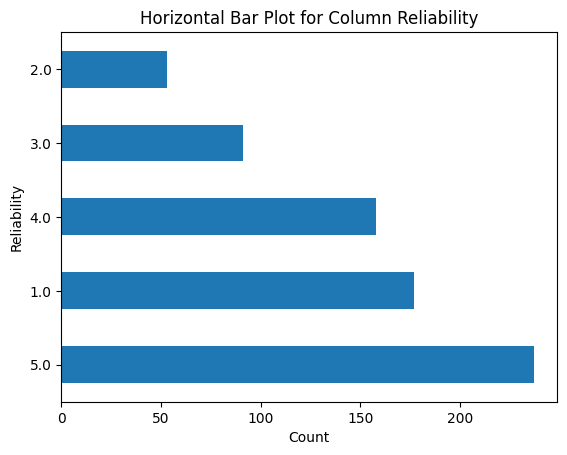

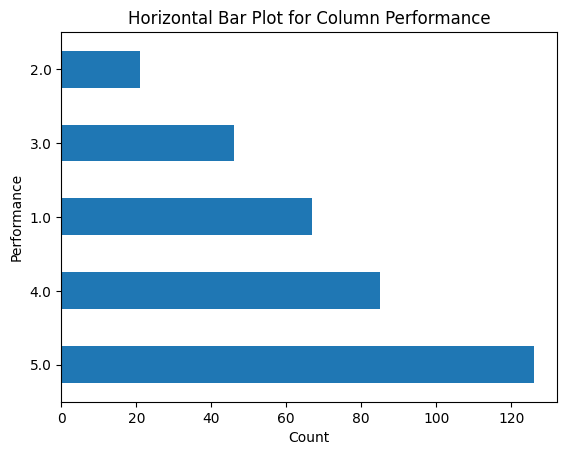

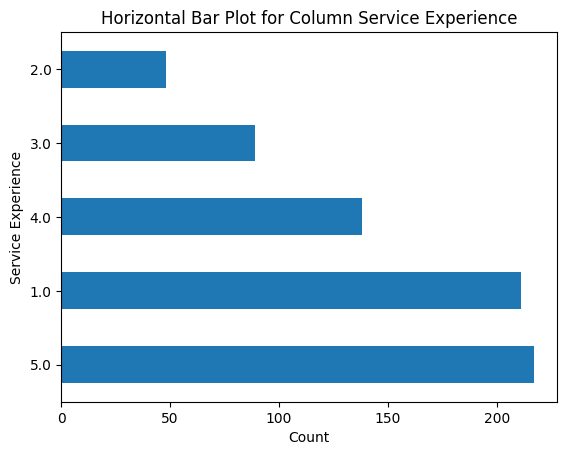

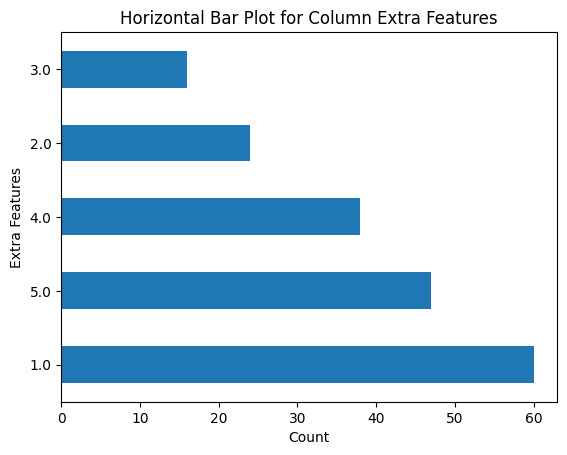

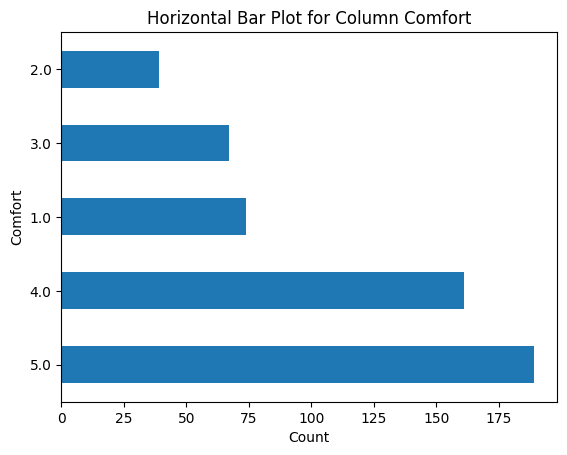

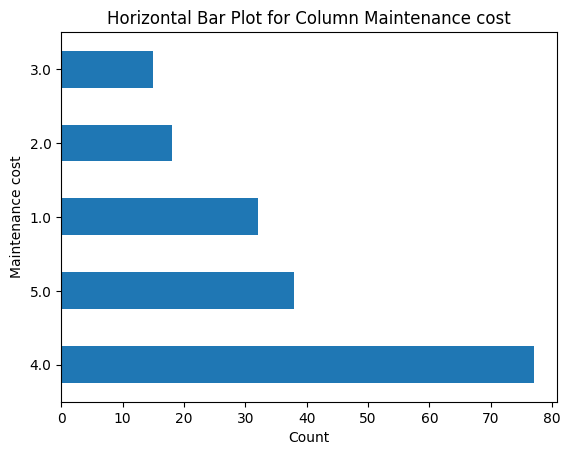

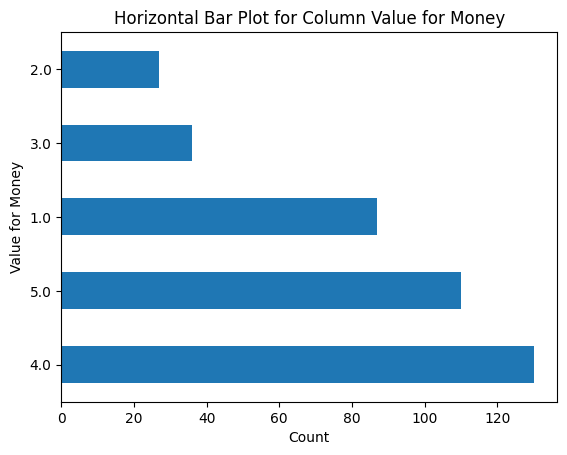

In [30]:
for col in columnsToProcess:
    data[col].value_counts().plot(kind='barh')
    plt.title(f'Horizontal Bar Plot for Column {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [31]:
mostCommonCategory = []

for col in columnsToProcess:
    mostCommonCategory.append(data[col].mode()[0])

In [32]:
for index,impute in enumerate(mostCommonCategory):
    data[columnsToProcess[index]].fillna(impute,inplace=True)

In [33]:
data.isna().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
Used it for                    0
Owned for                      0
Ridden for                     0
rating                         0
Visual Appeal                  0
Reliability                    0
Performance                    0
Service Experience             0
Extra Features                 0
Comfort                        0
Maintenance cost               0
Value for Money                0
sentiment                      0
dtype: int64

# Segmentation

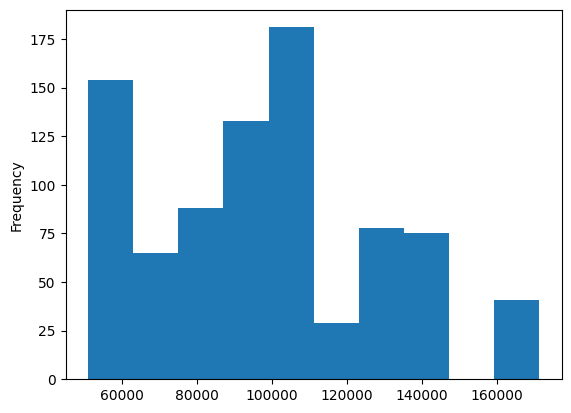

In [34]:
data.Price.plot.hist();

In [35]:
data.head(2)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Ampere Magnus EX,104758,121,53,90,7,1200,Everything,Never owned,< 5000 kms,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,positive
1,Ampere Magnus EX,104758,121,53,90,7,1200,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0,positive


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model Name                   844 non-null    object 
 1   Price                        844 non-null    int64  
 2   Riding Range (km)            844 non-null    int64  
 3   Top Speed (kmph)             844 non-null    int64  
 4   Weight (kg)                  844 non-null    int64  
 5   Battery Charging Time (hrs)  844 non-null    int64  
 6   Rated Power (W)              844 non-null    int64  
 7   Used it for                  844 non-null    object 
 8   Owned for                    844 non-null    object 
 9   Ridden for                   844 non-null    object 
 10  rating                       844 non-null    float64
 11  Visual Appeal                844 non-null    float64
 12  Reliability                  844 non-null    float64
 13  Performance         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


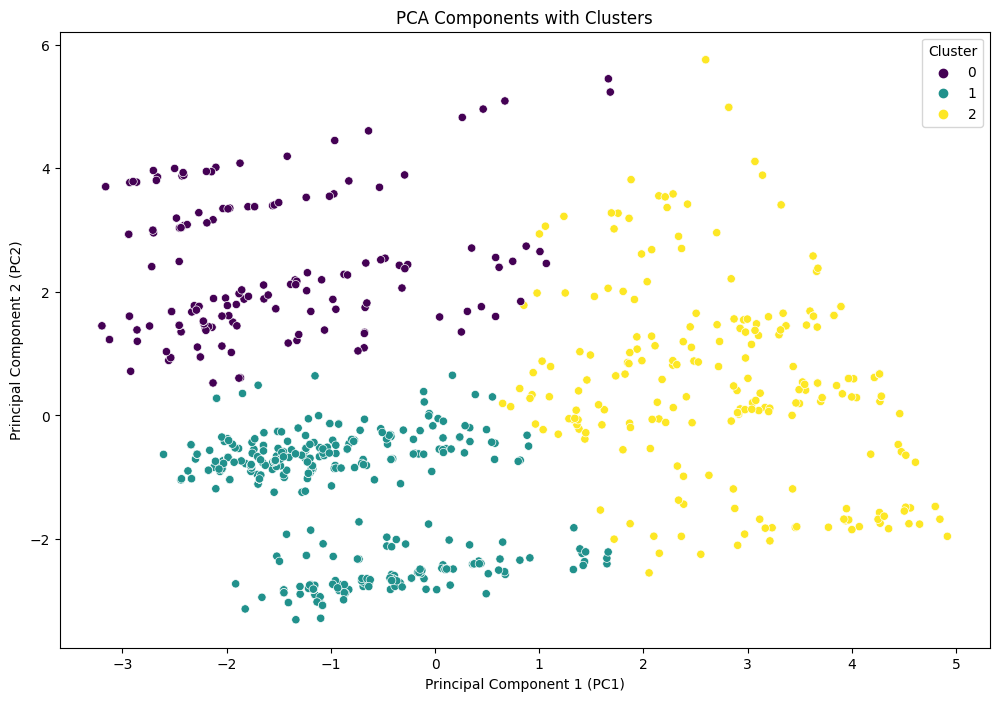

<Figure size 1400x800 with 0 Axes>

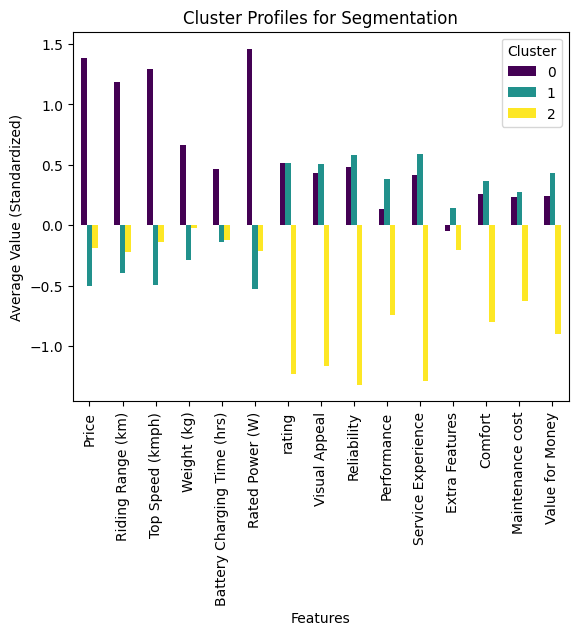

In [37]:
selected_features = [
    'Price',
    'Riding Range (km)',
    'Top Speed (kmph)',
    'Weight (kg)',
    'Battery Charging Time (hrs)',
    'Rated Power (W)',
    'rating',
    'Visual Appeal',
    'Reliability',
    'Performance',
    'Service Experience',
    'Extra Features',
    'Comfort',
    'Maintenance cost',
    'Value for Money'
]

# Subset the DataFrame with selected features
df_subset = data[selected_features]

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=selected_features)

# Perform KMeans clustering
n_clusters = 3  # Adjust based on your goals
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled[selected_features])
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_scaled['Cluster']

# Visualize the clusters in the reduced PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Components with Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# Analyze the characteristics of each cluster
cluster_profiles = df_scaled.groupby('Cluster').mean()
cluster_profiles = cluster_profiles.transpose()

# Plot the cluster profiles
plt.figure(figsize=(14, 8))
cluster_profiles.plot(kind='bar', cmap='viridis')
plt.title('Cluster Profiles for Segmentation')
plt.xlabel('Features')
plt.ylabel('Average Value (Standardized)')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

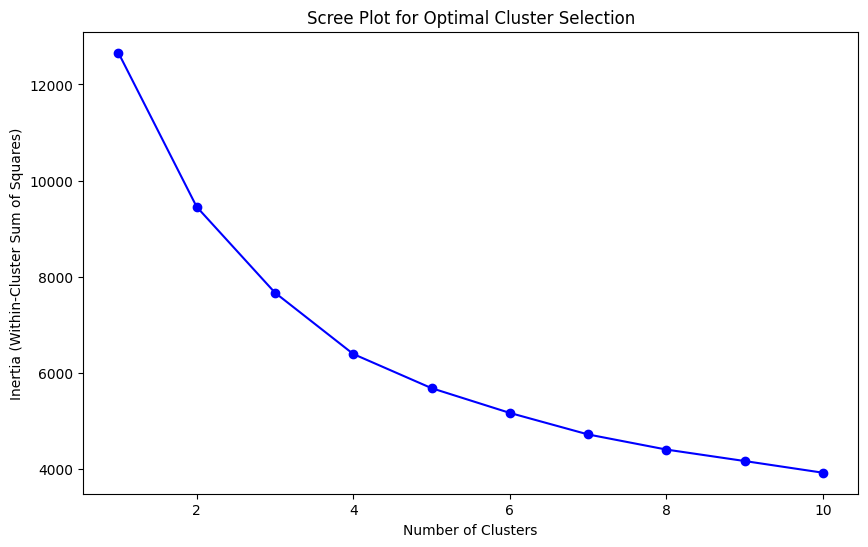

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


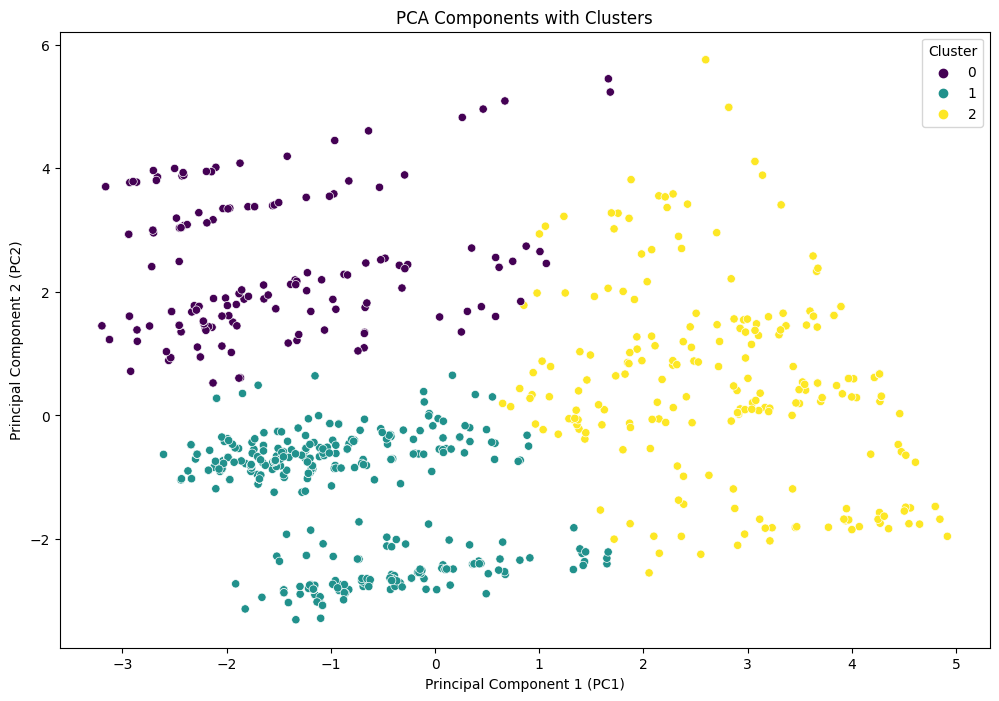

<Figure size 1400x800 with 0 Axes>

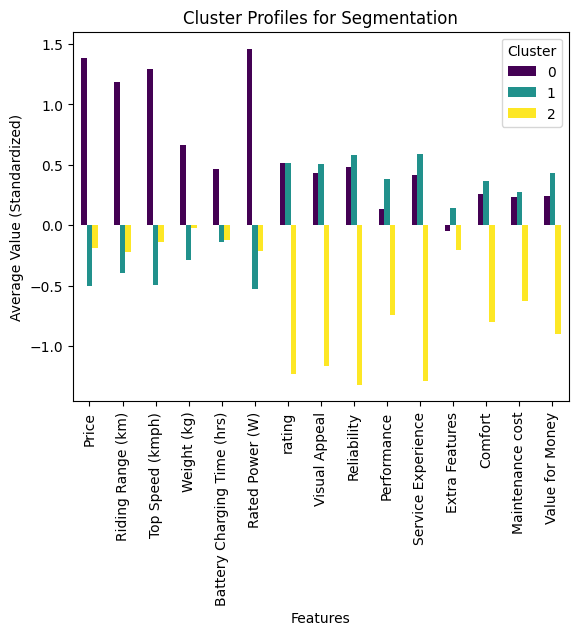

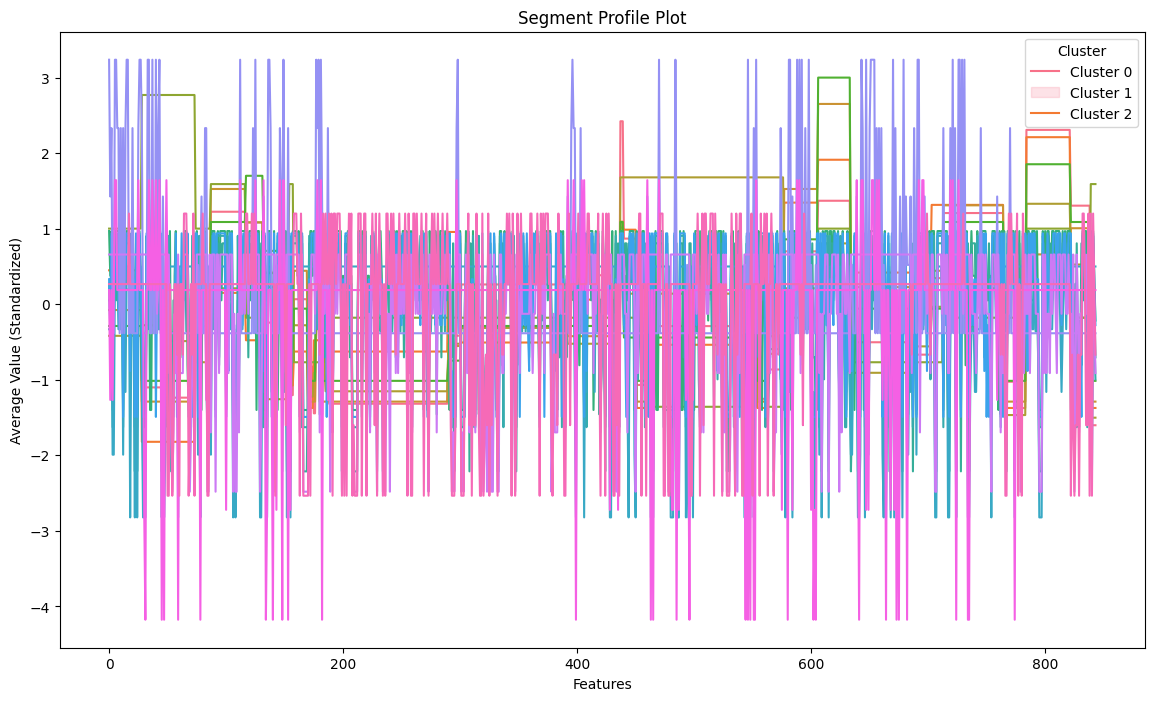

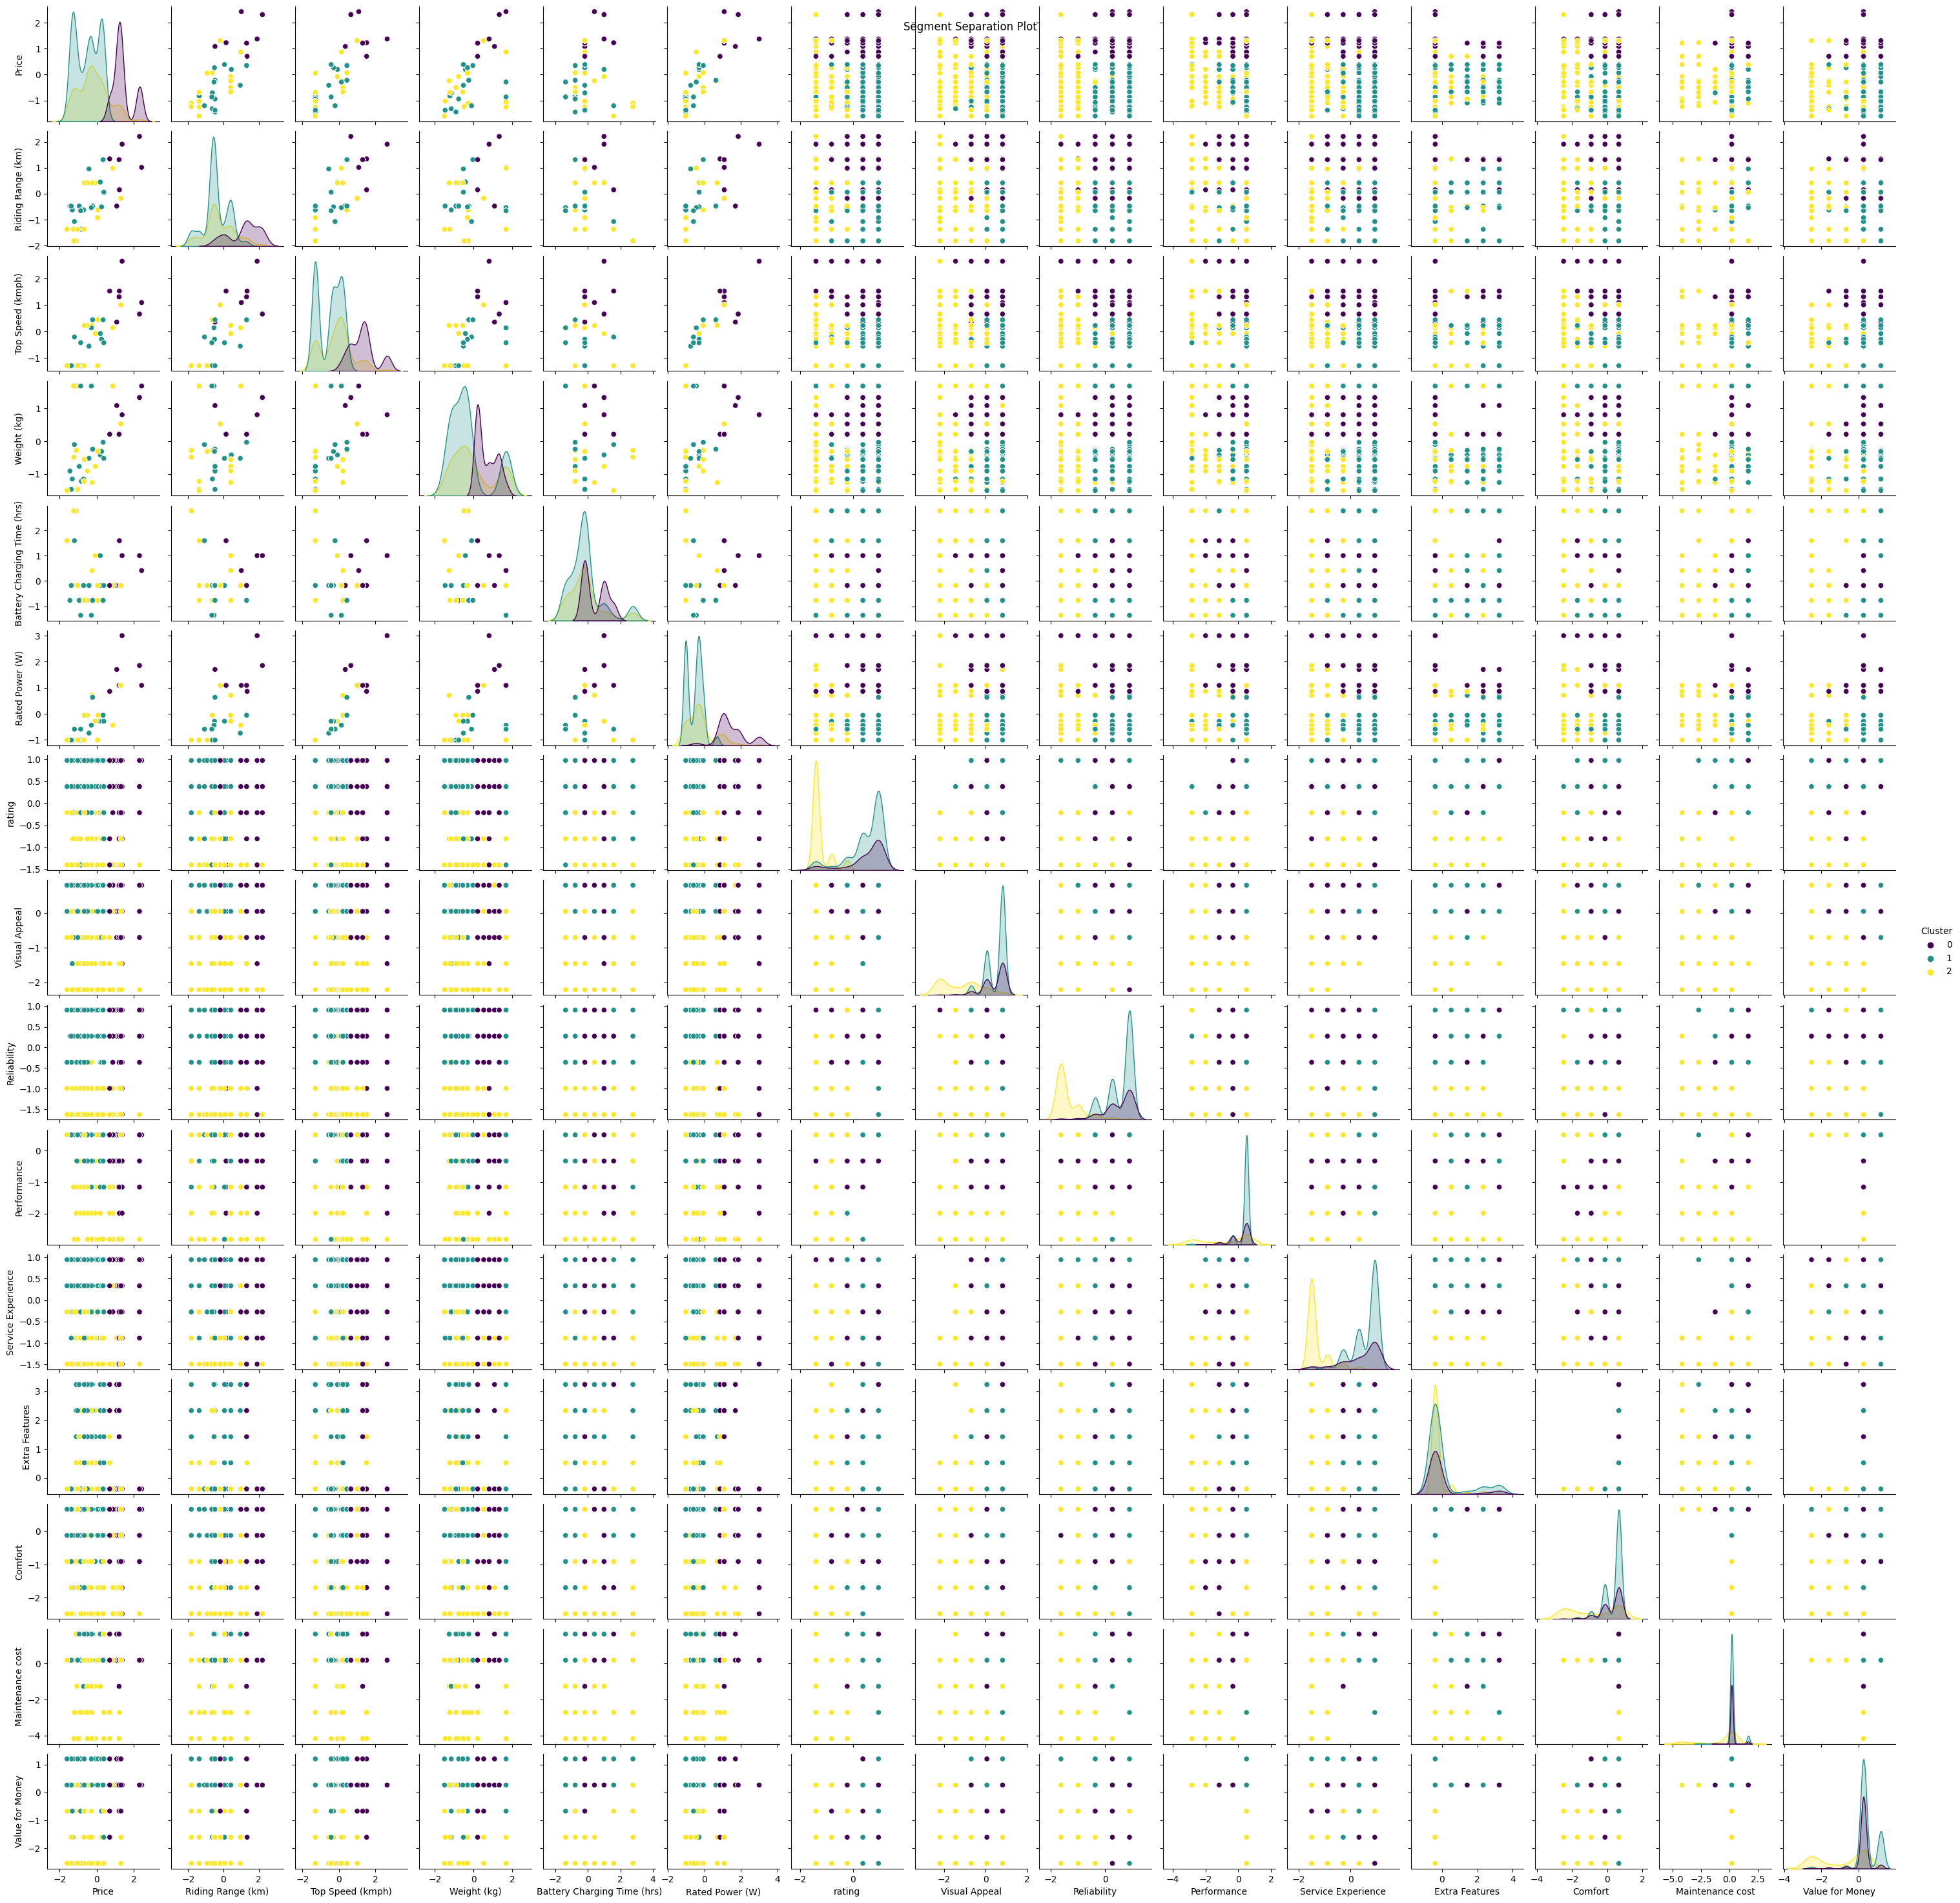

In [38]:
selected_features = [
    'Price',
    'Riding Range (km)',
    'Top Speed (kmph)',
    'Weight (kg)',
    'Battery Charging Time (hrs)',
    'Rated Power (W)',
    'rating',
    'Visual Appeal',
    'Reliability',
    'Performance',
    'Service Experience',
    'Extra Features',
    'Comfort',
    'Maintenance cost',
    'Value for Money'
]

# Subset the DataFrame with selected features
df_subset = data[selected_features]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=selected_features)

# Scree plot for optimal cluster selection
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for Optimal Cluster Selection')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

# Perform KMeans clustering with optimal number of clusters
n_clusters = 3  # Optimal number based on the scree plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled[selected_features])
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_scaled['Cluster']

# Visualize the clusters in the reduced PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Components with Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# Analyze the characteristics of each cluster
cluster_profiles = df_scaled.groupby('Cluster').mean()
cluster_profiles = cluster_profiles.transpose()

# Plot the cluster profiles
plt.figure(figsize=(14, 8))
cluster_profiles.plot(kind='bar', cmap='viridis')
plt.title('Cluster Profiles for Segmentation')
plt.xlabel('Features')
plt.ylabel('Average Value (Standardized)')
plt.legend(title='Cluster')
plt.show()

# Segment Profile Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_scaled[selected_features], dashes=False)
plt.title('Segment Profile Plot')
plt.xlabel('Features')
plt.ylabel('Average Value (Standardized)')
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(n_clusters)])
plt.show()

# Segment Separation Plot
sns.pairplot(df_scaled[selected_features + ['Cluster']], palette='viridis', diag_kind='kde', hue='Cluster', markers='o', height=2)
plt.suptitle('Segment Separation Plot')
plt.show()

In [39]:
data_segment = data[['Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money']].copy()

In [40]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 59.3 KB


In [41]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data_segment)

In [42]:
pca = PCA(random_state = 42)
pca.fit(scaledData)

PCA(random_state=42)

In [43]:
pcaData = pca.transform(scaledData)

In [44]:
pcaData

array([[-0.97871753,  0.81386196,  3.08656578, ..., -0.05992117,
         0.04324376, -0.01531292],
       [ 0.14328106,  1.44431978,  1.16863196, ...,  0.27283719,
        -0.31134821, -0.14572545],
       [-1.66344397,  0.20164408,  2.05256022, ..., -0.44068879,
         0.05279892,  0.06760457],
       ...,
       [-1.97402242,  0.29178907, -0.72383908, ...,  0.05223119,
        -0.24102973, -0.03436649],
       [-0.17026372, -0.36303459, -0.41702795, ...,  0.02552087,
        -0.32393576, -0.52266402],
       [ 1.33177529, -1.04304331, -0.16006608, ..., -0.08920326,
        -0.22711897, -0.50772024]])

In [45]:
PCA_DATA = pd.DataFrame(pcaData, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [46]:
PCA_DATA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.978718,0.813862,3.086566,0.119395,-0.380162,-0.059921,0.043244,-0.015313
1,0.143281,1.444320,1.168632,0.862543,-0.230828,0.272837,-0.311348,-0.145725
2,-1.663444,0.201644,2.052560,0.431103,-0.721831,-0.440689,0.052799,0.067605
3,1.730736,2.258960,-0.285195,-0.268775,0.419110,-0.188583,0.284053,-0.946510
4,-0.092864,1.362777,-0.243533,-1.030608,0.639514,-0.380544,1.248881,-0.751661
...,...,...,...,...,...,...,...,...
839,-1.704967,-0.056721,-0.753548,-0.380948,-0.635012,0.461075,-0.027774,0.027577
840,4.034134,-2.428246,0.304008,0.283150,-0.496195,-0.406665,0.146237,0.025409
841,-1.974022,0.291789,-0.723839,-0.207256,-0.217101,0.052231,-0.241030,-0.034366
842,-0.170264,-0.363035,-0.417028,-0.128462,-0.179161,0.025521,-0.323936,-0.522664


In [47]:
PCASummary = pd.DataFrame({'Standard Deviation':PCA_DATA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [48]:
factors = pd.DataFrame(pca.components_, columns = data_segment.columns, index = PCA_DATA.columns).T

In [49]:
factors.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.449553,-0.031486,-0.057866,0.169136,0.436541,0.742322,0.108888,-0.107185
Reliability,-0.476481,-0.039773,-0.078723,0.069182,-0.170103,-0.138993,0.283821,0.794728
Performance,-0.253362,-0.562344,-0.079331,0.434001,-0.244896,-0.061882,-0.596105,-0.076038
Service Experience,-0.468598,-0.038607,-0.088601,0.008600,-0.344476,-0.249180,0.495881,-0.586812
Extra Features,-0.123749,0.106792,0.955051,0.107913,-0.197353,0.099440,-0.026028,0.000806
Comfort,-0.342803,0.444036,0.037852,0.221301,0.532460,-0.520907,-0.271709,-0.078922
Maintenance cost,-0.214229,-0.532915,0.201212,-0.678931,0.360869,-0.187961,-0.054474,-0.012257
Value for Money,-0.329195,0.432591,-0.149231,-0.506566,-0.386227,0.217158,-0.478413,-0.020238


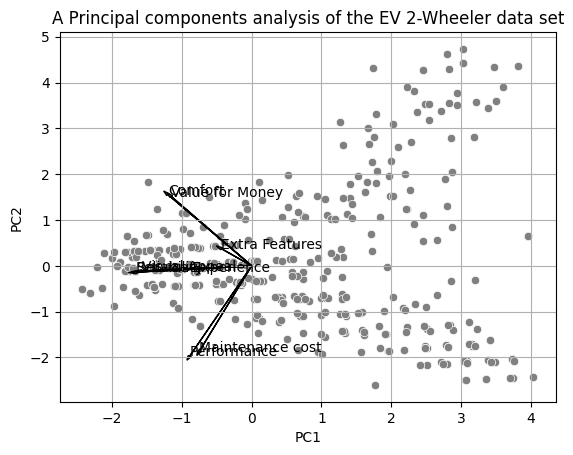

In [50]:
# Calculate centroid
index_names = factors.index

# Plot data points
sns.scatterplot(PCA_DATA, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factors['PC1'])):
    plt.arrow(0, 0, factors['PC1'][i] * 3.5, factors['PC2'][i] * 3.5, head_width=0.05, head_length=0.1)
    plt.text((factors['PC1'][i] * 3.5), factors['PC2'][i]* 3.5, index_names[i])

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model Name                   844 non-null    object 
 1   Price                        844 non-null    int64  
 2   Riding Range (km)            844 non-null    int64  
 3   Top Speed (kmph)             844 non-null    int64  
 4   Weight (kg)                  844 non-null    int64  
 5   Battery Charging Time (hrs)  844 non-null    int64  
 6   Rated Power (W)              844 non-null    int64  
 7   Used it for                  844 non-null    object 
 8   Owned for                    844 non-null    object 
 9   Ridden for                   844 non-null    object 
 10  rating                       844 non-null    float64
 11  Visual Appeal                844 non-null    float64
 12  Reliability                  844 non-null    float64
 13  Performance         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


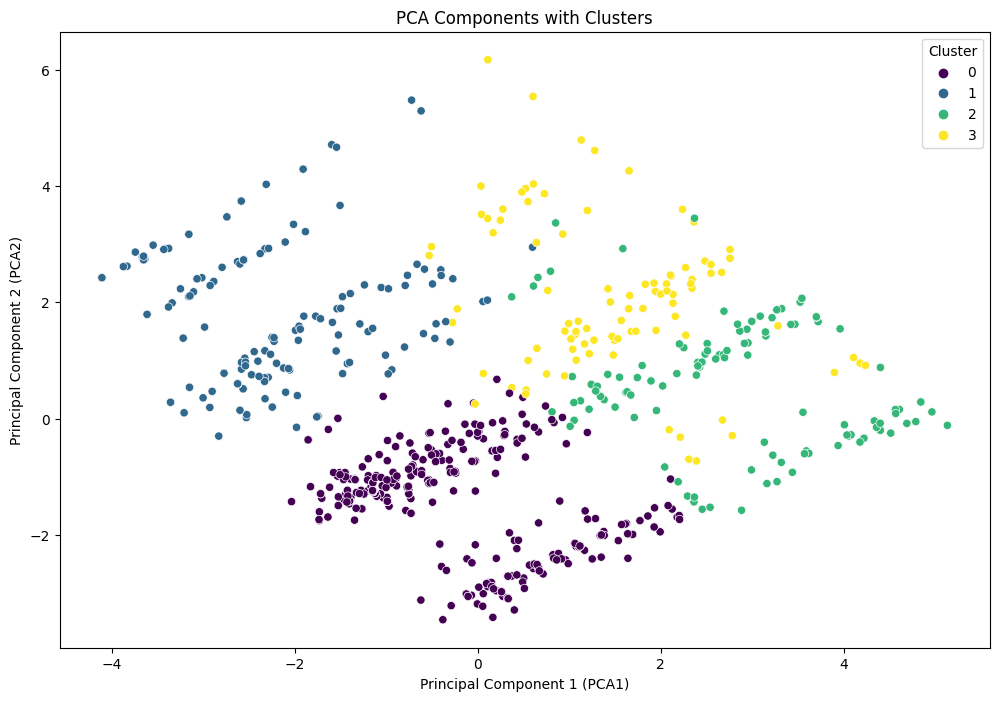

<ipython-input-52-bacda1bc3665>:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data.groupby('Cluster').mean().transpose()


<Figure size 1400x800 with 0 Axes>

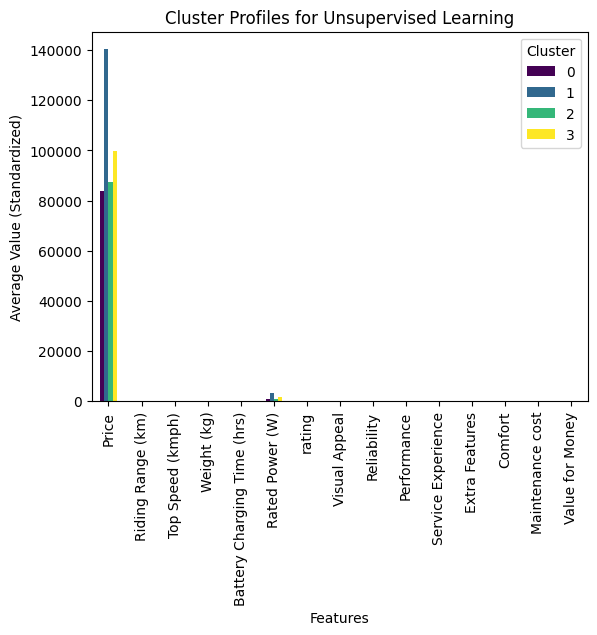

In [52]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['rating']).columns

# Subset the DataFrame with numerical features
X_clustering = data[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering
n_clusters = 4  # You can adjust the number of clusters based on the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters in reduced PCA space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = data['Cluster']

# Plot the clusters in the reduced PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Components with Clusters')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()

# Analyze the characteristics of each cluster
cluster_profiles = data.groupby('Cluster').mean().transpose()

# Plot the cluster profiles
plt.figure(figsize=(14, 8))
cluster_profiles.plot(kind='bar', cmap='viridis')
plt.title('Cluster Profiles for Unsupervised Learning')
plt.xlabel('Features')
plt.ylabel('Average Value (Standardized)')
plt.legend(title='Cluster')
plt.show()

In [53]:
desc_data = data.copy()


In [54]:
desc_data.columns

Index(['Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money', 'sentiment',
       'Cluster'],
      dtype='object')

In [55]:
desc_data.Cluster.value_counts()

0    411
1    186
2    136
3    111
Name: Cluster, dtype: int64

In [56]:
# Function to create a Mosaic Plot
def make_mosaic_plot(df,color_list,figsize=(5,5), barwidth=1, title="Simple mosaic plot" , xlabel="cat"):

  fig, ax = plt.subplots(figsize=figsize)

  ratio_df = df.div(df.sum(1),axis=0)
  ratio_cum_df = ratio_df.cumsum(axis=1)

  # Getting columns
  col_order = ratio_cum_df.columns.tolist()

  x = [str(n) for n in ratio_cum_df.index.tolist()]

    # Do the actual plots
  for col, colour in zip(col_order[::-1], color_list):
      plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

  # Add in legend
  plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

  # Configure title and axis
  plt.title(title)
  plt.xlabel("Segments")
  ax.spines["right"].set_visible(False)
  ax.spines["left"].set_visible(False)
  ax.spines["top"].set_visible(False)
  plt.yticks([])
  plt.show()

In [65]:
color_list = ['#cc0066', '#3366ff', '#00cc44', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [66]:
sentiment_cluster = pd.crosstab(index = desc_data['Cluster'], columns = desc_data['sentiment'])

In [67]:
sentiment_cluster

sentiment,negative,neutral,positive
Cluster,,,
0,48,43,320
1,23,4,159
2,104,5,27
3,89,1,21


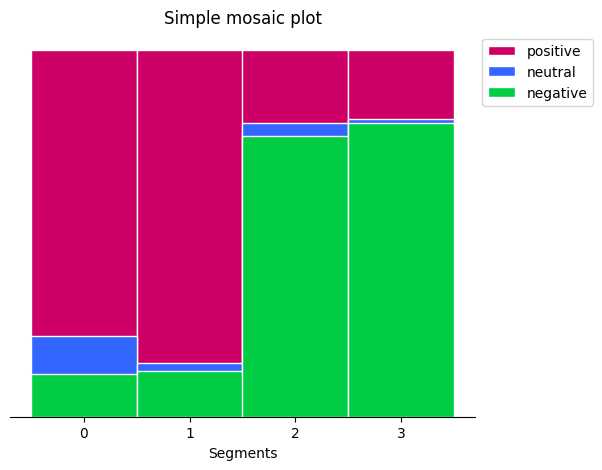

In [68]:
make_mosaic_plot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

Above mosaic plot, explores consumer sentiments, revealing that all segments, except Segment 2 and 3, exhibit positive sentiments. Segment 1 consumers stand out with a very low number of negative sentiments, indicating dissatisfaction across various aspects.'

In [69]:
used_cluster = pd.crosstab(index = desc_data['Cluster'], columns = desc_data['Used it for'])

In [70]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
Cluster,,,,,
0,295,80,11,20,5
1,116,50,6,13,1
2,108,9,1,16,2
3,81,21,2,7,0


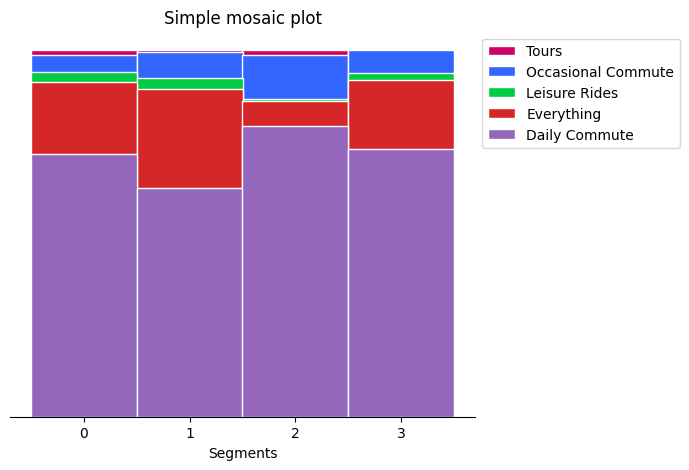

In [71]:
make_mosaic_plot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1)

From above plot we can conlcude that electric vehicles irrespective of the segment...are used more than 60% for daily-commute and a very little for another purpose....


In [76]:
desc_data.head(1)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),Used it for,Owned for,Ridden for,...,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment,Cluster
0,Ampere Magnus EX,104758,121,53,90,7,1200,Everything,Never owned,< 5000 kms,...,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,positive,0


In [77]:
owned_cluster = pd.crosstab(index = desc_data['Cluster'], columns = desc_data['Owned for'])

In [78]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
Cluster,,,,,,
0,54,69,124,91,72,1
1,21,20,42,13,90,0
2,20,28,23,62,3,0
3,16,17,31,37,10,0


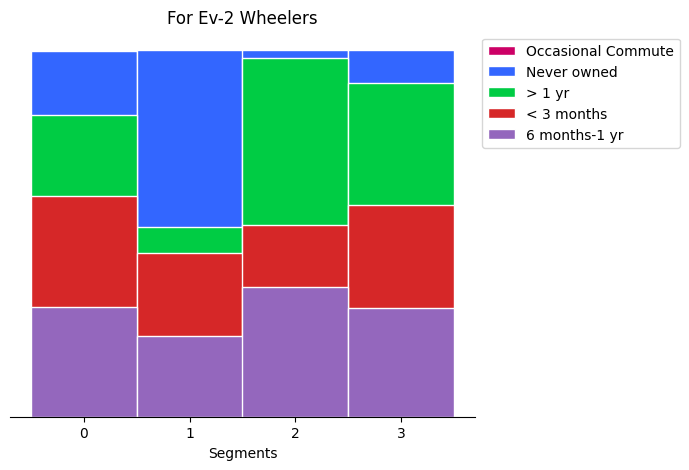

In [81]:
make_mosaic_plot(owned_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title="For Ev-2 Wheelers")

Above plot represents the different durations of the EV-owned by different segments....In segment 1 we can see almost half of the total people never owned 2Wheeler EV...and in the 3rd segment almost 50% of people owned the 2Wheeler EV for more than a year...in other rest of the 2 segments , the duration of the EV owned is almost same for each category

In [82]:
distance_traveled_cluster = pd.crosstab(index=desc_data["Cluster"],columns=desc_data["Ridden for"])

In [83]:
distance_traveled_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
Cluster,,,,,
0,19,67,303,21,1
1,2,16,165,3,0
2,9,29,92,6,0
3,2,26,75,8,0


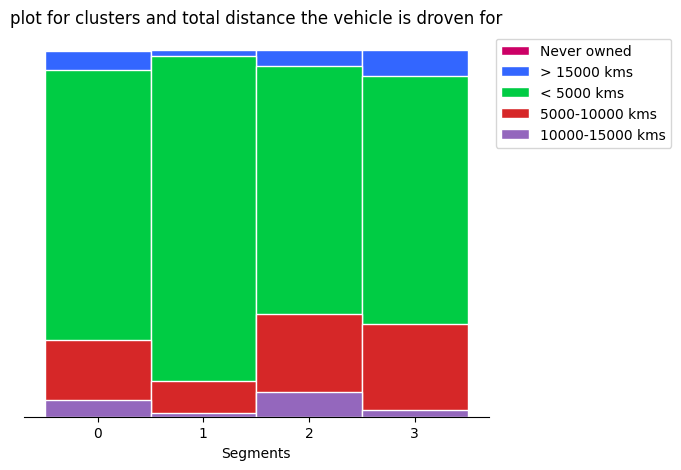

In [85]:
make_mosaic_plot(distance_traveled_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = "plot for clusters and total distance the vehicle is droven for")

Above plot clearly indicates that almost 80% of the vehicles in each segment has ridden for less than 5000 kms...while amost 5 percent in each segment has ridden for greater than 15000 kms ....

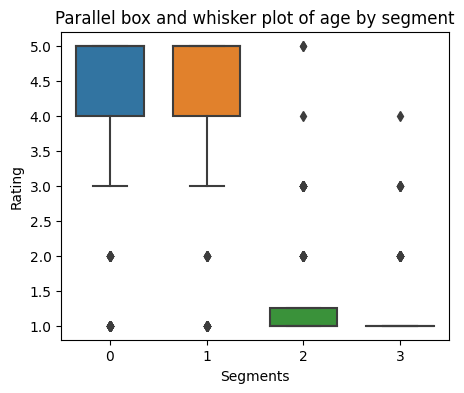

In [88]:
# Plot of specific cluster along x-axis and y-axis
plt.figure(figsize=(5,4))
sns.boxplot(desc_data,x="Cluster", y="rating", palette="tab10", width=0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.show()


We can see a very little amount of low rating in the segment 2 and 3...where as in the segment 0 and segmnet 1 we see almost equal amount of positive rating

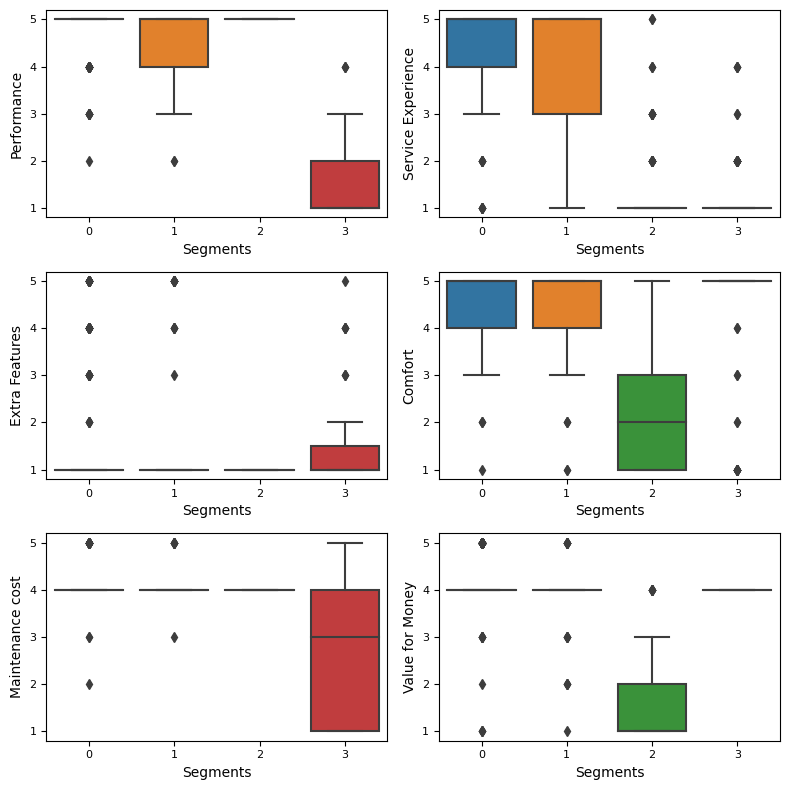

In [93]:
plt.figure(figsize = (8, 8))
for i, col in enumerate(desc_data.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(desc_data, x = 'Cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

In analysing the specifications of the different vehicles we see lot of vehicles in segment 1 are costly and some of the vehicles of the segment 3 are cheap...Segment 0 and 1 indicates high servicing charges for EV so for common people its better to go with other 2 segments...segment 3 among all other segments provides most extra features....in terms of comfortness the segment 2 has good amount of vehciles, so we can use this for targetting audience who loves long distance travel...other segments are good for daily commute task...
Segment 3 has higher maintenance cost then other vehicles....

##Conclusion

The Indian electric vehicle (EV) market exhibits a diverse and dynamic landscape, with segmentation driven by various factors such as vehicle type, price range, and technological features. Understanding these segments is crucial for market players to tailor their strategies and offerings


From various research we observed that Two-Wheelers dominates the Indian market capturing a significant position in Indian Market, this can be attributed to their affordability, efficiency, and suitability for urban commuting

Despite growing interest, the premium EV segment faces challenges related to high initial costs, range anxiety, and a limited charging infrastructure. Strategic measures are essential to overcome these hurdles and tap into the untapped potential of the premium EV market.

The optimal price range of the EV-Vehicles are in between ~89,000 and ~1,50,000 for 2Wheelers with the battery charging time in between 3 and 5....and rated power around 1500W to 5800W